In [1]:
import pandas as pd
import numpy as np

In [2]:
#import Scraped data
scopus_data = pd.read_csv('data/scopus_publications_multiple_topics.csv')

In [3]:
scopus_data.head()

,Topic,Title,Authors,Publication,Date,Citations
0,artificial intelligence,Perspectives on label-free microscopy of heter...,Pham D.L.,Journal of biomedical optics,2025-12-01,0
1,artificial intelligence,Autoencoder-based image denoiser suitable for ...,Maghraby M.,Journal of Advanced Research in Applied Scienc...,2025-03-01,0
2,artificial intelligence,An Artificial Intelligence Approach to Monitor...,Haron N.H.,Journal of Advanced Research in Applied Scienc...,2025-02-01,0
3,artificial intelligence,Efficient and easily recyclable photocatalytic...,Liang Y.,Separation and Purification Technology,2025-01-01,0
4,artificial intelligence,Modified Levey-Jennings Chart with Robust Esti...,Dahari S.,Journal of Advanced Research in Applied Scienc...,2025-01-01,0


## Supprimer les doublons par titre et conserver la première occurrence

In [6]:
scopus_data =scopus_data.drop_duplicates(subset="Title",keep="first")
scopus_data['Date'] = pd.to_datetime(scopus_data['Date'])
scopus_data['Year'] = scopus_data['Date'].dt.year

In [7]:
scopus_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 0 to 424
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Topic        119 non-null    object        
 1   Title        119 non-null    object        
 2   Authors      119 non-null    object        
 3   Publication  119 non-null    object        
 4   Date         119 non-null    datetime64[ns]
 5   Citations    119 non-null    int64         
 6   Year         119 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 7.0+ KB


In [8]:
scopus_data[['Citations','Year']].describe()

,Citations,Year
count,119.000000,119.000000
mean,0.075630,2024.327731
std,0.371886,0.471371
min,0.000000,2024.000000
25%,0.000000,2024.000000
50%,0.000000,2024.000000
75%,0.000000,2025.000000
max,3.000000,2025.000000


In [9]:
scopus_data.dtypes

Topic                  object
Title                  object
Authors                object
Publication            object
Date           datetime64[ns]
Citations               int64
Year                    int32
dtype: object

## Convertir la colonne 'Date' en datetime pour faciliter l'analyse

In [10]:
scopus_data['Date'] = pd.to_datetime(scopus_data['Date'])
scopus_data.dtypes

Topic                  object
Title                  object
Authors                object
Publication            object
Date           datetime64[ns]
Citations               int64
Year                    int32
dtype: object

##  S'assurer que 'Citations' est de type int pour les opérations de somme

In [11]:
scopus_data['Citations'] = pd.to_numeric(scopus_data['Citations']).fillna(0).astype(int)
scopus_data.dtypes

Topic                  object
Title                  object
Authors                object
Publication            object
Date           datetime64[ns]
Citations               int32
Year                    int32
dtype: object

## Calculer le nombre total de citations pour chaque Topic

In [12]:
total_citation = scopus_data.groupby("Topic")["Citations"].sum().reset_index()
total_citation.rename(columns={"Citations":"Total Cited"},inplace=True)
total_citation.sort_values(by="Total Cited",ascending=False)

,Topic,Total Cited
0,artificial intelligence,4
3,machine learning,4
1,computer vision,1
2,data science,0
4,natural language processing,0


##  Analyser la répartition des publications par année

In [13]:
publications_per_year = scopus_data.groupby("Year")["Title"].count().reset_index(name="Publication")
publications_per_year

,Year,Publication
0,2024,80
1,2025,39


## Calculer des statistiques telles que la moyenne, la médiane, le minimum et le maximum des citations pour comprendre l'impact des citations des publications.

In [14]:
citation_statistics = { 'Mean Citations': scopus_data['Citations'].mean(),
    'Median Citations': scopus_data['Citations'].median(),
    'Min Citations': scopus_data['Citations'].min(),
    'Max Citations': scopus_data['Citations'].max() }

print("Statistiques de citations :")
for stat, value in citation_statistics.items():
     print(f"{stat} : {value:.2f}")

Statistiques de citations :
Mean Citations : 0.08
Median Citations : 0.00
Min Citations : 0.00
Max Citations : 3.00


## Identifier les publications avec les citations les plus élevées.

In [15]:
top_publications = scopus_data.sort_values(by="Citations",ascending=False).head(5)
top_publications

,Topic,Title,Authors,Publication,Date,Citations,Year
113,machine learning,Spatial differentiation of carbon emissions fr...,Cao H.,Journal of Environmental Sciences (China),2025-03-01,3,2025
10,artificial intelligence,Diabetes and its associated factors: A Retrosp...,Amin F.,Pakistan Journal of Medical Sciences,2024-12-05,2,2024
9,artificial intelligence,AI-Enhanced Teaching Materials for Education: ...,Syahrizal S.,International Journal of Religion,2024-12-10,1,2024
406,computer vision,RadioGalaxyNET: Dataset and novel computer vis...,Gupta N.,Publications of the Astronomical Society of Au...,2024-12-11,1,2024
103,machine learning,Interpreting hourly mass concentrations of PM<...,Li H.,Journal of Environmental Sciences (China),2025-05-01,1,2025


## Analyser la répartition des publications par auteurs. Cela peut aider à comprendre les modèles de collaboration.

In [17]:
publications_per_author = scopus_data.groupby('Authors').size().reset_index(name='Publications')
publications_per_author.sort_values(by="Publications",ascending=False)

,Authors,Publications
61,Li L.,2
0,Abdelsamie M.M.,1
74,Mou X.,1
86,Quillivic R.,1
85,Qin D.,1
...,...,...
35,Gou Y.,1
34,Gope A.,1
33,Gok S.,1
32,Ghaemi Asl M.,1


## Examiner la répartition des publications à travers différents sujets pour voir quels domaines sont les plus étudiés

In [21]:
publications_per_topic = scopus_data.groupby("Topic").size().reset_index(name='Publications')
publications_per_topic

,Topic,Publications
0,artificial intelligence,25
1,computer vision,23
2,data science,23
3,machine learning,24
4,natural language processing,24


## Analyser comment les publications dans chaque sujet ont évolué au fil des années.

In [24]:
publications_per_topic_year = scopus_data.groupby(['Topic', 'Year']).size().reset_index(name='Publications')
publications_per_topic_year

,Topic,Year,Publications
0,artificial intelligence,2024,18
1,artificial intelligence,2025,7
2,computer vision,2024,19
3,computer vision,2025,4
4,data science,2024,22
5,data science,2025,1
6,machine learning,2025,24
7,natural language processing,2024,21
8,natural language processing,2025,3


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

C:\Users\lamaachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lamaachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


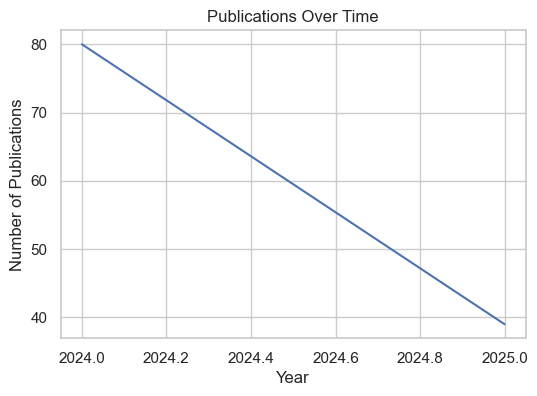

In [34]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=publications_per_year, x='Year', y='Publication')
plt.title('Publications Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()

C:\Users\lamaachi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


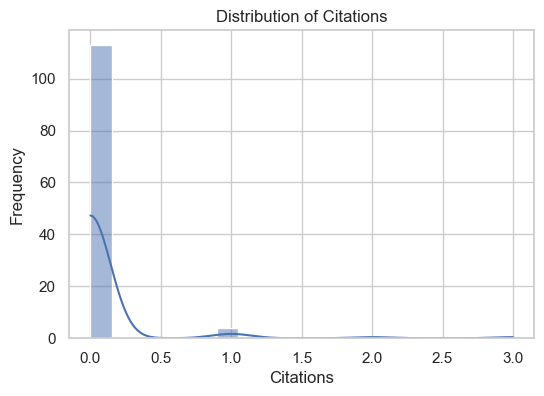

In [33]:
# Citations statistics
plt.figure(figsize=(6, 4))
sns.histplot(scopus_data['Citations'], bins=20, kde=True)
plt.title('Distribution of Citations')
plt.xlabel('Citations')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

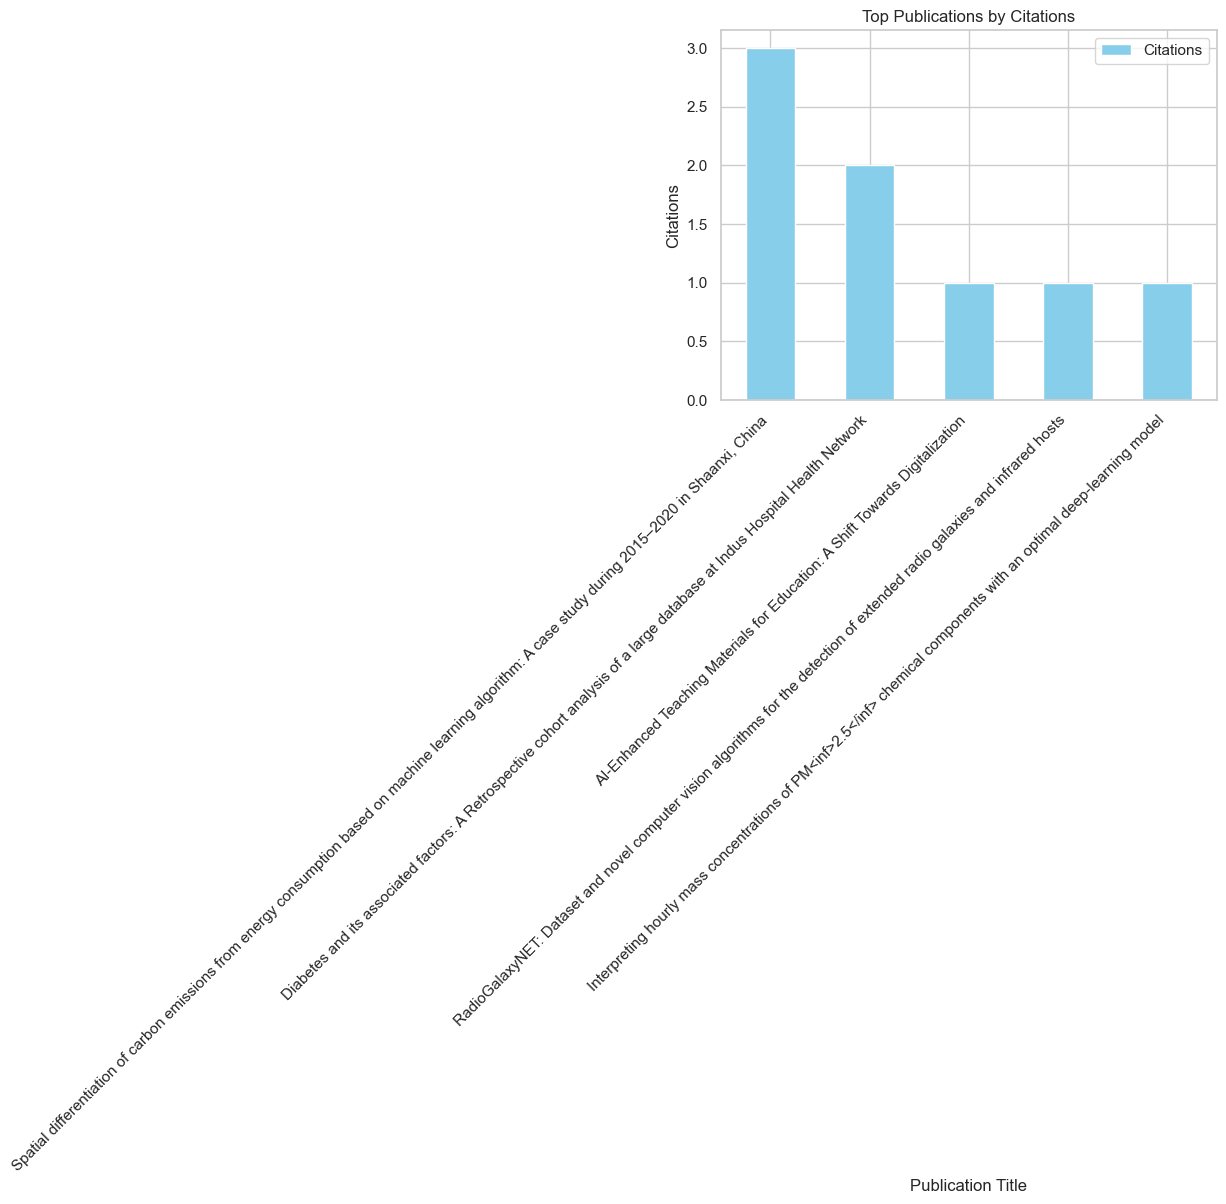

In [32]:
# Top publications by citations
plt.figure(figsize=(8, 6))
top_publications.plot(kind='bar', x='Title', y='Citations', color='skyblue')
plt.title('Top Publications by Citations')
plt.xlabel('Publication Title')
plt.ylabel('Citations')
plt.xticks(rotation=45, ha="right")
plt.show()